In [2]:
.libPaths(c('/home/ssapkot/.conda/envs/r_env_360/lib', .libPaths()))

#install.packages("coda",repos='http://cran.us.r-project.org', dependencies = TRUE)
library(BGLR)
#library(doMC)
#library(foreach)
library(tidyverse)
library(ggplot2)
library(ggpubr)

setwd("/panicle/ssapkot/StarchProtein")

In [3]:
file = read.table('results/GWAS/YPP_Parameters_mean.txt', stringsAsFactors=FALSE, sep='\t', header=TRUE)
#file = file[order(-file$abs.beta.g),]
head(file)
#file$p_wald <- file$p_lrt
# observed <- sort(file$p_wald)
# lobs <- -(log10(observed))

# expected <- c(1:length(observed)) 
# lexp <- -(log10(expected / (length(expected)+1)))

# pdf("qqplot.pdf", width=6, height=6)
# plot(c(0,7), c(0,7), col="red", lwd=3, type="l", xlab="Expected (-logP)", ylab="Observed (-logP)", xlim=c(0,7), ylim=c(0,7), las=1, xaxs="i", yaxs="i", bty="l")
# points(lexp, lobs, pch=23, cex=.4, bg="black") 
# dev.off()

#png('results/QQ_StaCovPrt_maf0.05.png', width=300, height=300)
# qq(file$p_wald)
# #dev.off()
# #file$p.adj = p.adjust(file$p_wald, method="BH")
# #head(file)
# #qq(file$p_wald)
#file$log_p = -log10(file$p_value)
# #file\$adj.P <- p.adjust(file\$gamma, method = 'bonferroni') ##bonferroni-correction
# sig <- -log10(0.05/nrow(file))
# nrow(file)
# #sig <- 5
# sugg <- 5
# max(file$log_p)

# gwas.sig <- file[file$log_p > sig,]
# mysnps <- gwas.sig$rs
# head(file)
#write.csv(gwas.sig, '/panicle/ssapkot/GrainComp/RF/results_features/data/BSLMM/LMM_MultiVariate_SP_sigSNPs.csv', row.names=FALSE)

CHR,RS,PS,alpha,beta,gamma,abs.beta.g
1,S1_2404,2404,-1.667120e-04,-0.175686450,0.00030135,5.294311e-05
1,S1_2482,2482,-4.858801e-04,-0.424045160,0.00054985,2.331612e-04
1,S1_14393,14393,7.034262e-04,0.367248050,0.00026775,9.833067e-05
1,S1_14632,14632,5.206933e-04,0.233893660,0.00029845,6.980556e-05
1,S1_20388,20388,4.190223e-05,0.007522966,0.00033050,2.486340e-06
1,S1_23566,23566,-6.383699e-04,-0.433208500,0.00087825,3.804654e-04


In [10]:
####GWAS_plotting_manhattan function
library(ggrepel)
gg.manhattan <- function(df, threshold, hlight, ylims, title){
nCHR <- length(unique(df$CHR))
df$BPcum <- NA
s <- 0
nbp <- c()
for (i in unique(df$CHR)){
      nbp[i] <- max(df[df$CHR == i,]$PS)
        df[df$CHR == i,'BPcum'] <- df[df$CHR == i,'PS'] + s
          s <- s + nbp[i]
      }

###Setting up the parameters and axis
axis.set <- df %>%
  group_by(CHR) %>%
    summarize(center = (max(BPcum) + min(BPcum)) / 2)

   # ylim <- abs(floor(log10(min(df\$gamma)))) + 2

#     df.tmp <- df %>%
#          # Add highlight and annotation information
#             #mutate( is_highlight=ifelse(RS %in% hlight, 'yes', 'no')) %>%
#             mutate( is_annotate=ifelse(gamma > threshold, 'yes', 'no'))

  ggplot(df, aes(x=BPcum, y=abs.beta.g)) +
    geom_point(aes(color=as.factor(CHR)), alpha = 0.8, size = 2) +
    ##add highlighted points
    #geom_point(data=subset(df.tmp, is_highlight=='yes'), color='darkgreen', size=2) +

    #custom axes
    scale_color_manual(values = rep(c('darkslateblue','orange'), nCHR)) +
    scale_x_continuous(label = axis.set$CHR, breaks = axis.set$center) +
    scale_y_continuous(expand = c(0,0), limits = ylims) +

    # add genome-wide significant and suggested lines
    #geom_hline(yintercept = sig, color = 'forestgreen', linetype = 'dashed') +
    #geom_hline(yintercept = sugg, color = 'blue', linetype = 'dashed') +

    ggtitle(paste0(title)) +
    labs(x = 'chromosome', y = 'Gamma') +

    # Add label using ggrepel to avoid overlapping
    #geom_label_repel(data=df.tmp[df.tmp$is_annotate=='yes',], aes(label=as.factor(RS), alpha=0.7), size=5, force=1.3) +

    #customize the theme
    theme_bw(base_size=20) +
    theme(
    legend.position = 'none',
    panel.border = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    axis.text.x = element_text(angle = 0,  vjust = 0.5))
    }

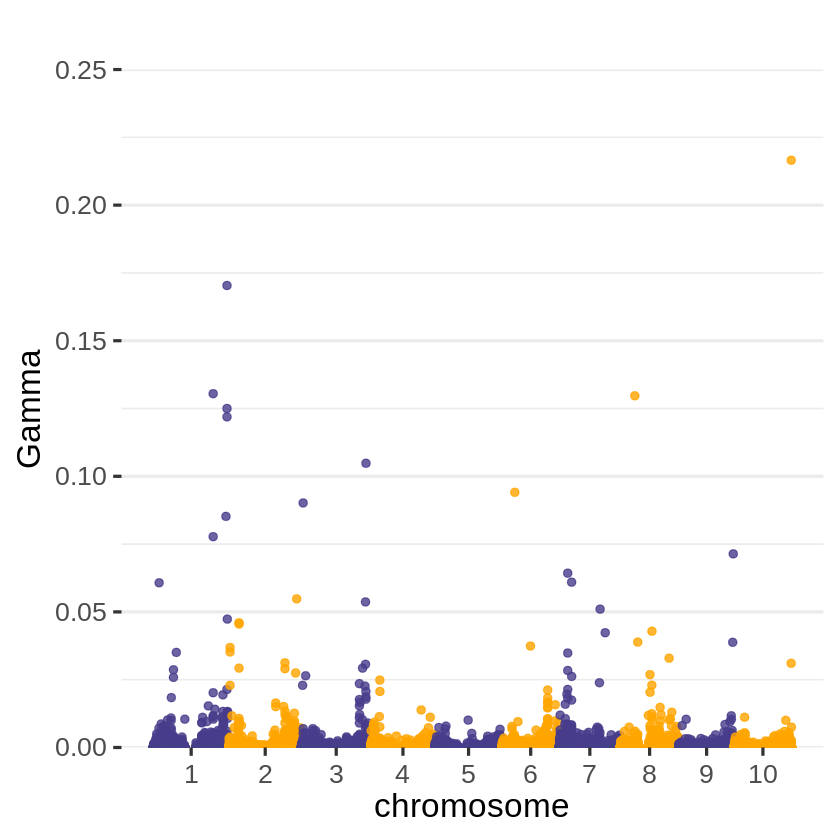

In [11]:
# png('SAP_Starch_BSLMM.png', width=1200, height=400)
# gg.manhattan(file, sig, mysnps, c(0,10),'')
# dev.off()

gg.manhattan(file, sig, mysnps,c(0,0.25),'')